# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url ="http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | urangan
Processing Record 3 of Set 1 | isangel
Processing Record 4 of Set 1 | kudahuvadhoo
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | hinton
Processing Record 8 of Set 1 | mossel bay
Processing Record 9 of Set 1 | badger
Processing Record 10 of Set 1 | dwarka
Processing Record 11 of Set 1 | isafjordur
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | tongliao
Processing Record 14 of Set 1 | vorgashor
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | enewetak
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | tura
Processing Record 20 of Set 1 | whitehorse
Processing Record 21 of Set 1 | cargados carajos
City not found. Skippin

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Show Record Count
city_data_df.count()

City_ID       577
City_ID.3     577
City_ID.2     577
City_ID.1     577
City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       574
Date          577
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City_ID,City_ID.3,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,0,0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,1,1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,2,2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,3,3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,4,4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City_ID.4,City_ID.3,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,,,,
0,0,0,0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,1,1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,2,2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,3,3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,4,4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

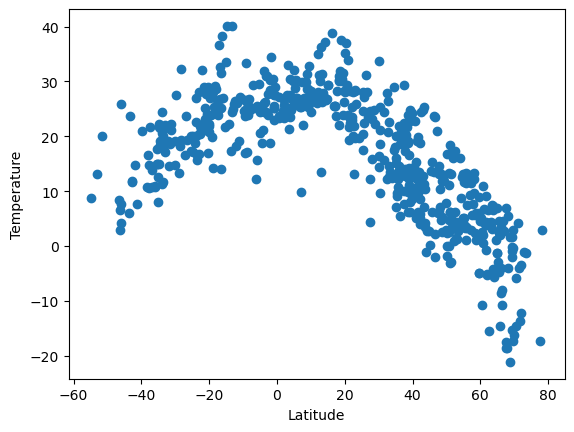

In [22]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

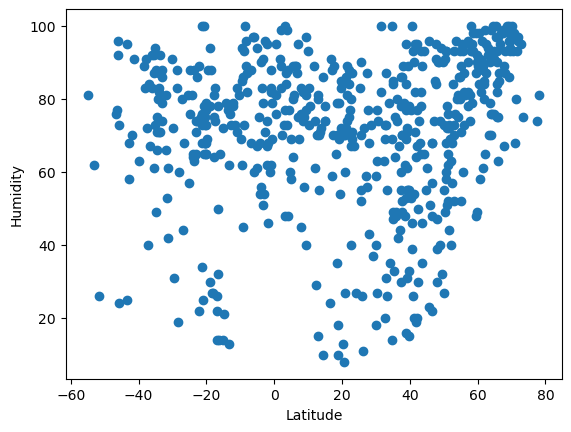

In [23]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

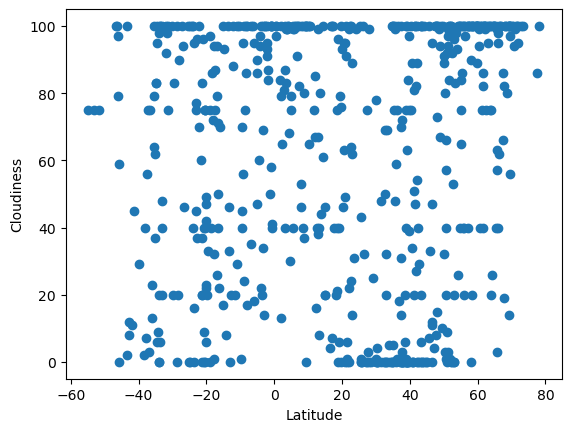

In [24]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

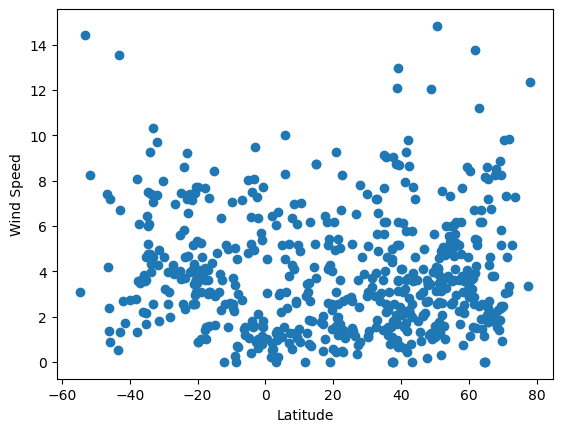

In [25]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coord):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regression_line = slope * np.array(x_values) + intercept
    line= "y =" + str(round(slope,2)) + "x+" + str(round(intercept,2))
    
    # Plot the data points
    plt.scatter(x_values, y_values)
    
    # Plot the regression line
    plt.plot(x_values, regression_line,"r-")
    
    #Show formula
    plt.annotate(line, text_coord, fontsize=15, color="red")
    
    # Add title and labels
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel("Title")

    print(f"The r-squared is: {r_value}")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hem_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hem_df.head()

,City_ID.4,City_ID.3,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,,,,
0,0,0,0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,1,1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,3,3,3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,4,4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,6,6,6,6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hem_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hem_df.head()

,City_ID.4,City_ID.3,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,,,,
2,2,2,2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,5,5,5,5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,7,7,7,7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,9,9,9,9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,10,10,10,10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8462548186825364


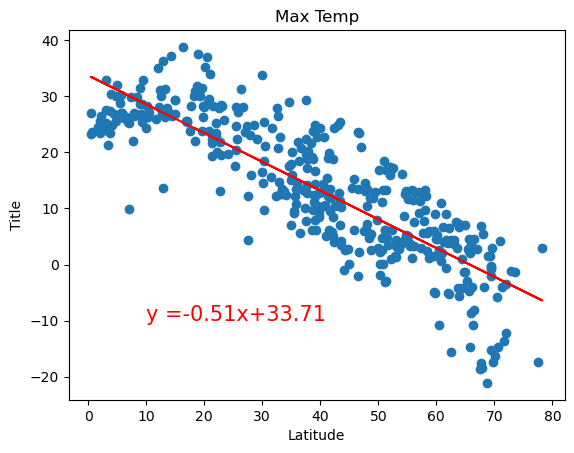

In [146]:
# Linear regression on Northern Hemisphere
x_values = northern_hem_df ["Lat"]
y_values = northern_hem_df ["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (10,-10))

The r-squared is: 0.6419546065421801


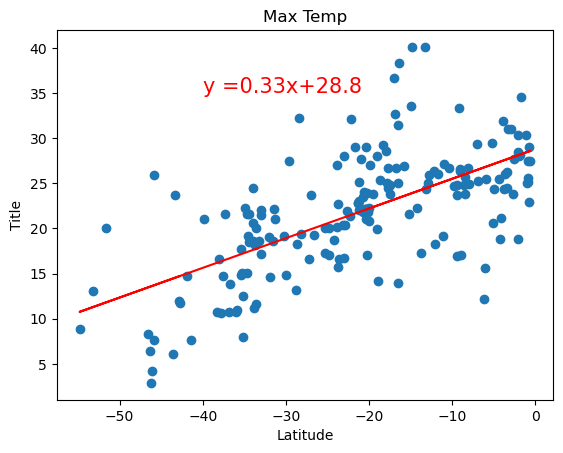

In [147]:
# Linear regression on Southern Hemisphere
x_values = southern_hem_df ["Lat"]
y_values = southern_hem_df ["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-40,35))

**Discussion about the linear relationship:** The Southern Hemisphere's linear regression model has a higher R-squared value compared to the Nothern Hemisphere.  This indicates that latitude alone may not be a strong predictor of temprature levels. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.2385317912939407


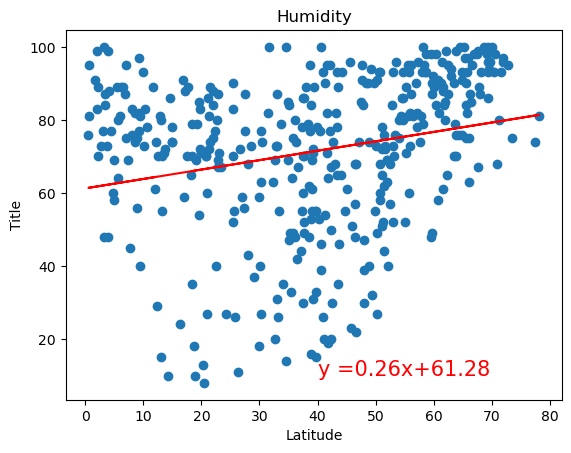

In [133]:
# Northern Hemisphere
x_values = northern_hem_df ["Lat"]
y_values = northern_hem_df ["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (40,10))

The r-squared is: 0.016759316950056818


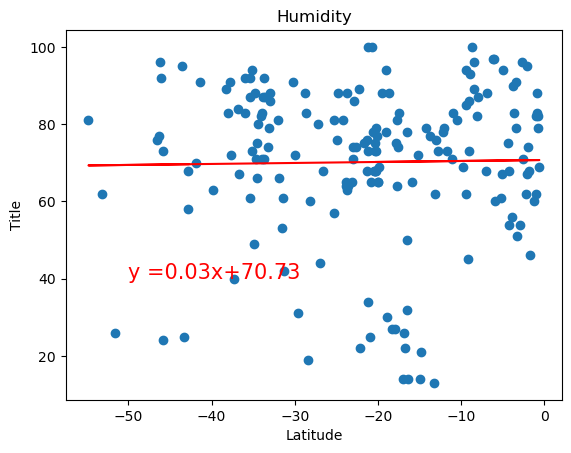

In [142]:
# Southern Hemisphere
x_values = southern_hem_df ["Lat"]
y_values = southern_hem_df ["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50,40))

**Discussion about the linear relationship:** There is slight indication of a relationship between latitude and humidity in both Southern and Northern hemispheres but the Latitude alone does not fully explain the variability in humidity levels. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.155004893876971


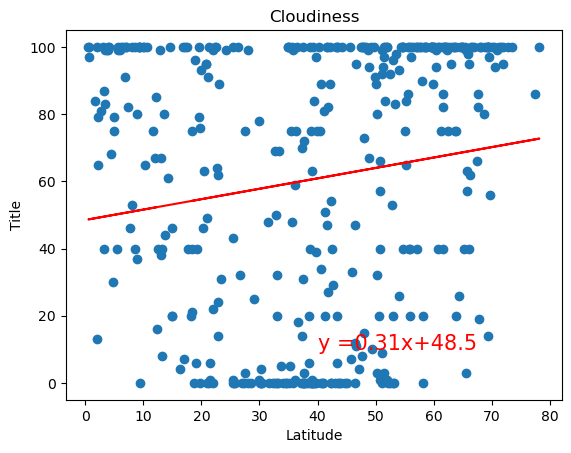

In [135]:
# Northern Hemisphere
x_values = northern_hem_df ["Lat"]
y_values = northern_hem_df ["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10))

The r-squared is: 0.14341322916643243


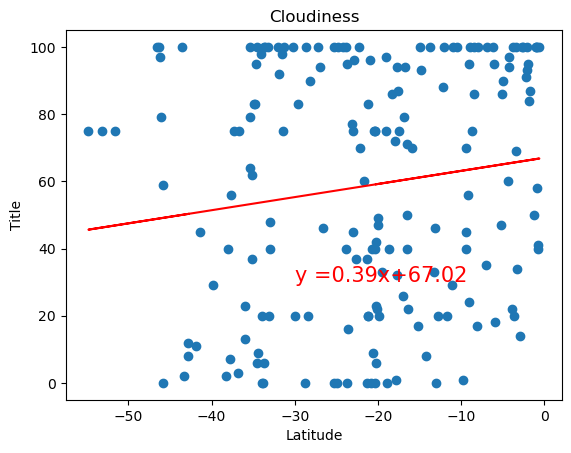

In [136]:
# Southern Hemisphere
x_values = southern_hem_df ["Lat"]
y_values = southern_hem_df ["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))

**Discussion about the linear relationship:** There seems to be a slight corrilation between latitude and cloudiness in both Northern and Southern Hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.17434667290903338


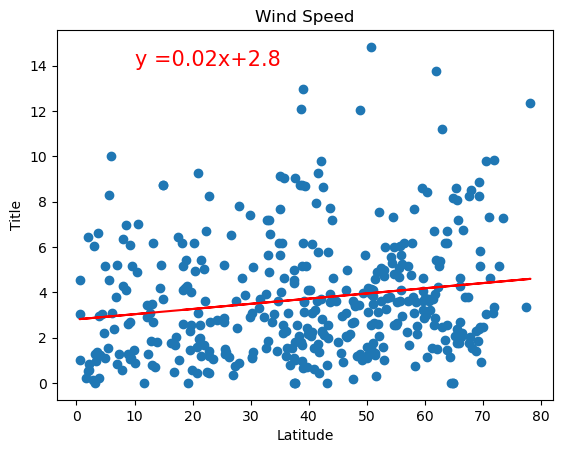

In [143]:
# Northern Hemisphere
x_values = northern_hem_df ["Lat"]
y_values = northern_hem_df ["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,14))

The r-squared is: -0.24947753546264592


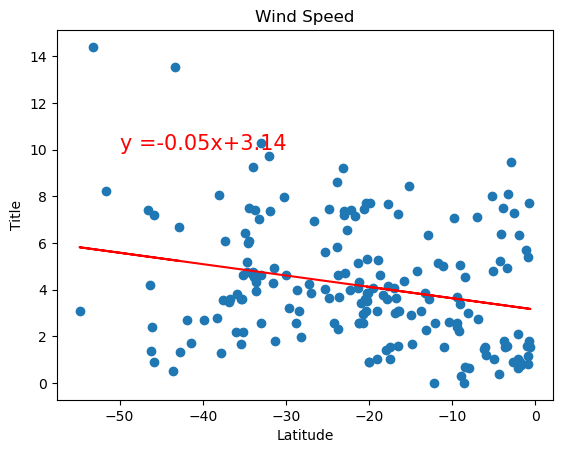

In [144]:
# Southern Hemisphere
x_values = southern_hem_df ["Lat"]
y_values = southern_hem_df ["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50,10))

**Discussion about the linear relationship:** The positive R-squared value indicates that the linear regression model explains some variability in wind speed in the Northern Hemisphere. The negative R-squared value suggests that the linear regression model provides a poor fit to the data in the Southern Hemisphere.